In [54]:
import pandas as pd
race_df = pd.read_csv('./csv/cleaned_race_data.csv')
horse_df = pd.read_csv('./csv/cleaned_horse_data.csv',  converters={'owner_id':str})

In [55]:
def get_race_result_with_name(race_df, horse_df, name):
    res = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
    tgt_df = race_df[race_df['race_title'].str.contains(name)]
    for i in tgt_df.race_id:
        res = pd.concat([res, horse_df[horse_df['race_id'] == i]])
    return res
    

In [60]:
def get_race_result_with_course (race_df, horse_df, course, distance, ground):
    res = pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
    tgt_df = race_df[(race_df.where_racecourse == course) & (race_df.distance == distance) & (race_df.ground_type == ground)]
    for i in tgt_df.race_id:
        res = pd.concat([res, horse_df[horse_df['race_id'] == i]])
    return res
    

In [65]:
nakayama_1800 = get_race_result_with_course(race_df, horse_df, '阪神', 1600, '芝')



In [66]:
nakayama_1800.head()

,race_id,rank,frame_number,horse_number,horse_id,horse_name,age,burden_weight,rider_id,goal_time,...,owner_id,date,is_down,is_senba,is_mesu,is_osu,distance,avg_velocity,horse_weight_dif,burden_weight_rate
7668,200809020109,1,5,9,2003102977,キャプテンベガ,5,57.0,5203,94.3,...,151006,2008-03-29 14:35:00,0,0,0,1,1600,16.967126,-2.0,0.128959
7669,200809020109,2,2,3,2003105450,トレノジュビリー,5,57.0,1026,94.4,...,539002,2008-03-29 14:35:00,0,0,0,1,1600,16.949153,-8.0,0.125000
7670,200809020109,3,5,8,2002110041,エイシンヴァイデン,6,57.0,637,94.5,...,951005,2008-03-29 14:35:00,0,0,0,1,1600,16.931217,-2.0,0.119247
7671,200809020109,4,7,12,2003102972,クイックシューター,5,57.0,5243,94.5,...,708800,2008-03-29 14:35:00,0,0,0,1,1600,16.931217,-2.0,0.122845
7672,200809020109,5,3,4,2002104446,ニホンピロリビエラ,6,57.0,1062,94.6,...,985001,2008-03-29 14:35:00,0,0,0,1,1600,16.913319,2.0,0.120253


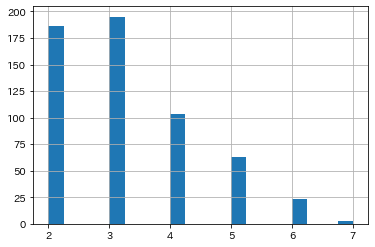

In [67]:
top3 = nakayama_1800[nakayama_1800['rank'] <= 1]
top3.age.hist(bins = 20)

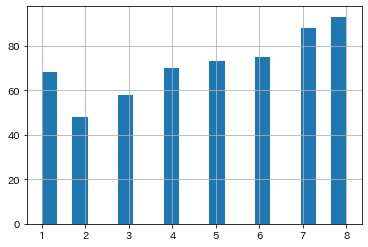

In [68]:
top3.frame_number.hist(bins=20)

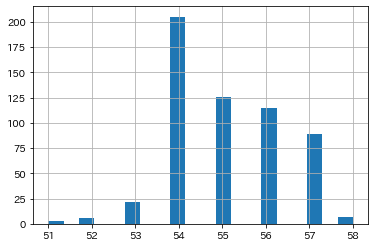

In [69]:
top3.burden_weight.hist(bins=20)